In [9]:
using Compose
using Colors

In [35]:
include("ExtractGoddamnedPositions01.jl")

  likely near /home/karel/MigrandFranco/ExtractGoddamnedPositions01.jl:1
  likely near /home/karel/MigrandFranco/ExtractGoddamnedPositions01.jl:10
  likely near /home/karel/MigrandFranco/ExtractGoddamnedPositions01.jl:16


limpiaarraystringfloat2 (generic function with 1 method)

In [43]:
Coincidencias=readdlm("CoincidenciasPseudoRealesPureJulia01.dat");

In [44]:
PuntosGDyCA=Coincidencias[:,1:4];
ValoresLinea=Coincidencias[:,5:7];

In [45]:
PuntosGDyCA

15652x4 Array{Float64,2}:
 24.0  24.0  31.0  45.0
 24.0  27.0  31.0  45.0
 24.0  28.0  31.0  45.0
 25.0  20.0  31.0  45.0
 25.0  24.0  31.0  45.0
 25.0  25.0  31.0  45.0
 25.0  26.0  31.0  45.0
 25.0  27.0  31.0  45.0
 25.0  28.0  31.0  45.0
 26.0  20.0  31.0  45.0
 26.0  21.0  31.0  45.0
 26.0  25.0  31.0  45.0
 26.0  27.0  31.0  45.0
  ⋮                    
 51.0  13.0  53.0  32.0
 51.0  16.0  53.0  32.0
 51.0  17.0  53.0  32.0
 51.0  20.0  53.0  32.0
 52.0  12.0  53.0  32.0
 52.0  18.0  53.0  32.0
 52.0  20.0  53.0  32.0
 52.0  22.0  53.0  32.0
 52.0  24.0  53.0  32.0
 53.0  21.0  53.0  32.0
 53.0  23.0  53.0  32.0
 53.0  25.0  53.0  32.0

In [46]:
PuntosGDyCA[5,:]

1x4 Array{Float64,2}:
 25.0  24.0  31.0  45.0

In [59]:
lineas=Any[]
GDxs=Int[]
GDys=Int[]
CAxs=Int[]
CAys=Int[]

tantos=0
for a =1:size(PuntosGDyCA)[1]
    MuestraGDCA=vec(PuntosGDyCA[a,:])
    MuestraLinea=vec(ValoresLinea[a,:])
    GDx=MuestraGDCA[1]
    GDy=MuestraGDCA[2]
    CAx=MuestraGDCA[3]
    CAy=MuestraGDCA[4]
    Peso=MuestraLinea[1]/(MuestraLinea[2]+MuestraLinea[3]-MuestraLinea[1]) #Jaccard
    
    push!(GDxs,GDx)
        push!(GDys,GDy)
        push!(CAxs,CAx)
        push!(CAys,CAy)
    
    if(Peso>0.005)
        push!(lineas, 
        (context(), 
        line([(GDx,GDy),(CAx,CAy)]), linewidth(Peso*50), 
        stroke(RGB(100*Peso, 80-80*Peso,cos(100*Peso))
        )))
        tantos+=1
    end
end

In [61]:
tantos

316

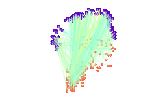

In [63]:
objeto=compose(context(units=UnitBox(0,0,65,65)), lineas...,  (context(),circle(GDxs, GDys, [0.5]), 
fill(RGB(0.4,0.0,0.76))), (context(), circle(CAxs, CAys, [0.34]), fill("tomato")))

In [64]:
draw(SVG("ConexionesRevueltasJacard01.svg", 20cm,20cm), objeto)